In [1]:
#default package
import datetime
import pickle
import sys 
import os
import importlib
import logging 
import pathlib
from logging import getLogger, StreamHandler, Formatter
from collections import defaultdict
import pickle

In [2]:
#third package
import pfrl
import torch
import torch.nn
import gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#my package
sys.path.append(os.path.join(pathlib.Path().resolve(),"../"))
import src.strategy.golden_core30 as golden_core30
import src.strategy.stockenv as senv
import src.strategy.stock_ddqn as sddqn

In [4]:
#reload
%load_ext autoreload
%autoreload 2

In [5]:
# graph setting
sns.set()

In [6]:
# logger
logger=logging.getLogger(__name__)
logging.basicConfig(level=logging.ERROR)

## Config

In [7]:
db_path='../data/mstock.db'
start_date_train=datetime.date(2012,1,1)
end_date_train=datetime.date(2019,1,1)
start_date_test=datetime.date(2019,1,1)
end_date_test=datetime.date(2020,1,1)
deposit=1000000
order_under_limit=10000
#with open('../simulator/codelist_core26.pkl','rb') as f:
#    code_list=pickle.load(f)
code_list=[2914,3382]

In [8]:
action_num=3
used_days=7
info_num=used_days*5+4 #check senv.calc_stock_state
n_episodes=10

## Train

In [9]:
rl_algo=sddqn.simulator_ddqn(db_path,deposit,code_list,info_num,action_num,used_days)

In [10]:
rl_algo.train(start_date_train,end_date_train,n_episodes)

/workspaces/load_to_goal/GitHub/stock_price_prediction/notebooks/../src/strategy/stockenv.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  reward=(p_sell-p_buy)/p_buy*s_sell/s_all
/workspaces/load_to_goal/GitHub/stock_price_prediction/notebooks/../src/strategy/stockenv.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  reward=(p_sell-p_buy)/p_buy*s_sell/s_all
/workspaces/load_to_goal/GitHub/stock_price_prediction/notebooks/../src/strategy/stockenv.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  reward=(p_sell-p_buy)/p_buy*s_sell/s_all
/workspaces/load_to_goal/GitHub/stock_price_prediction/notebooks/../src/strategy/stockenv.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  reward=(p_sell-p_buy)/p_buy*s_sell/s_all
/workspaces/load_to_goal/GitHub/stock_price_prediction/notebooks/../src/strategy/stockenv.py:87: RuntimeWarning: divide by zero encountered in double_scalars
  reward=(p_sell-p_buy)/p_buy*s_sell/s

## Test

In [11]:
result_df=defaultdict()
for (code,result) in zip(code_list,rl_algo.test(start_date_test,end_date_test)):
    result_df[code]=result

<AxesSubplot:>

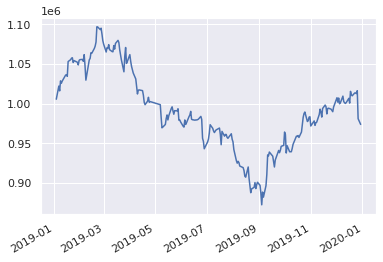

In [12]:
result_df[2914][1]['price'].plot()

<AxesSubplot:>

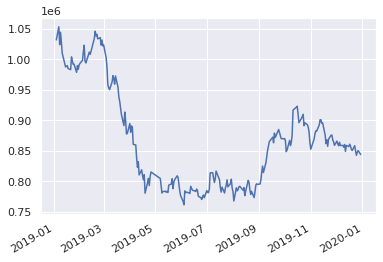

In [13]:
result_df[3382][1]['price'].plot()

## comparison with golden cross & dead cross

In [14]:
_,gc_result_df=golden_core30.simulate_golden_dead_cross(
    db_path,start_date_test,end_date_test,code_list,deposit,order_under_limit
)

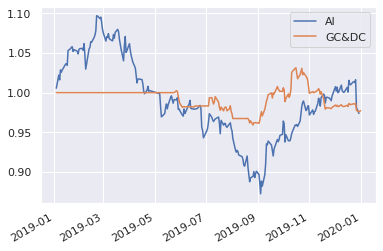

In [15]:
(result_df[2914][1]['price']/1e6).plot(label='RL')
(gc_result_df['price']/1e6).plot(label='GC&DC')
plt.legend()

## save

In [16]:
#save
with open('../data/result_df.pkl','wb') as f:
    pickle.dump(result_df,f)

In [17]:
with open('../data/gc_result_df.pkl','wb') as f:
    pickle.dump(gc_result_df,f)

In [15]:
rl_algo.save()